In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import glob
import re

In [6]:
#load images
images_path = '/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images'
crosses_path = '/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/crosses'

images = glob.glob(os.path.join(images_path, '*.jpg'))
crosses = glob.glob(os.path.join(crosses_path, '*.npy'))

images.sort(key=lambda f: int(re.sub('\D', '', f)))
crosses.sort(key=lambda f: int(re.sub('\D', '', f)))

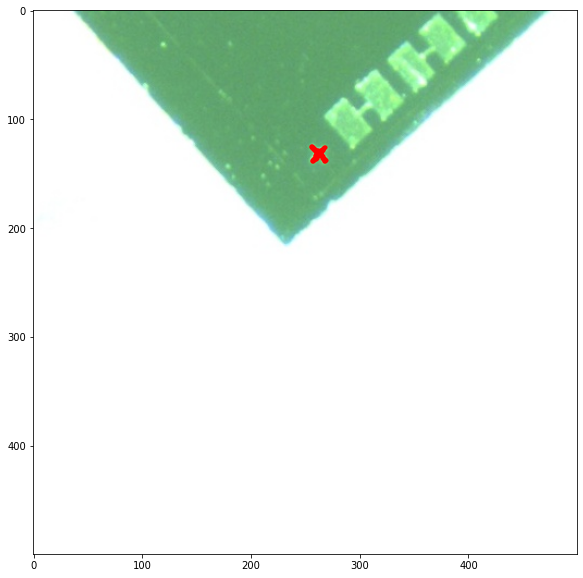

In [7]:
#plot images
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(images[1]))
x,y = np.load(crosses[1])
ax.scatter(x, y, c='r', s=10)
plt.show()

In [8]:
#create boxes

for i, c in enumerate(crosses):
    x,y = np.load(c)
    x = x/500.0
    y = y/500.0
    print(x,y)
    #calculate center, width and height
    center = [(x.max()-x.min())/2+x.min(), (y.max()-y.min())/2+y.min()]
    print(center)
    width = x.max()-x.min()
    height = y.max()-y.min()
    box = [0, center[0], center[1], width, height]
    #round to 6 decimal places
    box = [round(x, 6) for x in box]
    print(box)
    #save boxes in txt file with the same name as image
    with open(f'/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/{i+1}.txt', 'w') as f:
        f.write(' '.join(str(x) for x in box))
        f.write('\n')

[0.49  0.492 0.494 0.494 0.496 0.496 0.498 0.498 0.5   0.5   0.502 0.502
 0.504 0.504 0.506 0.506 0.508 0.508 0.51  0.51  0.512 0.512 0.514 0.516
 0.516 0.514 0.514 0.514 0.512 0.512 0.51  0.51  0.508 0.508 0.506 0.506
 0.504 0.502 0.5   0.5   0.498 0.496 0.494 0.492 0.492 0.498 0.504 0.506
 0.506 0.508 0.508 0.51  0.512 0.512 0.514 0.514 0.516 0.514 0.512 0.51
 0.508 0.504 0.502 0.506 0.502 0.504 0.5   0.498 0.498 0.5   0.502 0.498
 0.5   0.502 0.504 0.498 0.496 0.496 0.494 0.492 0.492 0.49  0.49  0.492
 0.494 0.494 0.496 0.492 0.49  0.494 0.496 0.498 0.51  0.516 0.518 0.508
 0.508] [0.474 0.474 0.476 0.478 0.478 0.48  0.482 0.484 0.484 0.486 0.486 0.488
 0.488 0.49  0.49  0.492 0.492 0.494 0.494 0.496 0.496 0.498 0.498 0.498
 0.5   0.5   0.496 0.494 0.494 0.492 0.492 0.49  0.49  0.488 0.488 0.486
 0.484 0.482 0.482 0.48  0.478 0.476 0.474 0.472 0.476 0.48  0.482 0.482
 0.48  0.48  0.478 0.478 0.476 0.474 0.474 0.472 0.474 0.476 0.478 0.48
 0.482 0.48  0.48  0.484 0.484 0.486 0.488 0.

[0.0, 0.504, 0.486, 0.028, 0.028]
[245. 246. 247. 247. 248. 248. 249. 249. 250. 250. 251. 251. 252. 252.
 253. 253. 254. 254. 255. 255. 256. 256. 257. 258. 258. 257. 257. 257.
 256. 256. 255. 255. 254. 254. 253. 253. 252. 251. 250. 250. 249. 248.
 247. 246. 246. 249. 252. 253. 253. 254. 254. 255. 256. 256. 257. 257.
 258. 257. 256. 255. 254. 252. 251. 253. 251. 252. 250. 249. 249. 250.
 251. 249. 250. 251. 252. 249. 248. 248. 247. 246. 246. 245. 245. 246.
 247. 247. 248. 246. 245. 247. 248. 249. 255. 258. 259. 254. 254.] [237. 237. 238. 239. 239. 240. 241. 242. 242. 243. 243. 244. 244. 245.
 245. 246. 246. 247. 247. 248. 248. 249. 249. 249. 250. 250. 248. 247.
 247. 246. 246. 245. 245. 244. 244. 243. 242. 241. 241. 240. 239. 238.
 237. 236. 238. 240. 241. 241. 240. 240. 239. 239. 238. 237. 237. 236.
 237. 238. 239. 240. 241. 240. 240. 242. 242. 243. 244. 244. 245. 245.
 245. 243. 246. 246. 246. 246. 245. 246. 247. 247. 248. 248. 249. 249.
 248. 246. 247. 250. 250. 249. 248. 247. 238. 2

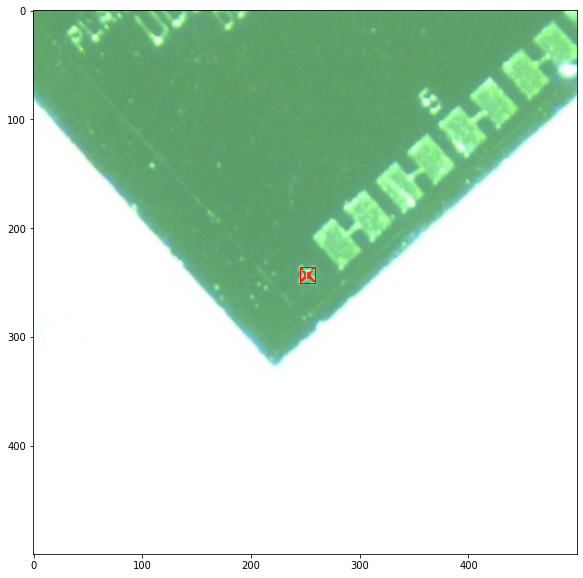

In [9]:
#upload boxes from file
boxes = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/*.txt')
boxes.sort(key=lambda f: int(re.sub('\D', '', f)))
#plot boxes and images
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(images[0]))
x,y = np.load(crosses[0])
ax.scatter(x, y, c='r', s=0.1)
with open(boxes[0], 'r') as f:
    box = f.read().split()
    box = [float(x) for x in box]
    print(box)
    x_center = box[1]*500.0
    y_center = box[2]*500.0
    width = box[3]*500.0
    height = box[4]*500
    print(x,y,width,height)
    rect = plt.Rectangle((x_center-width/2, y_center-height/2), width, height, fill=False, color='r')
    ax.add_patch(rect)
plt.show()

In [10]:
#randomply get 20 images from dataset and move them to test folder
import shutil
import random

images = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/*.jpg')
images.sort(key=lambda f: int(re.sub('\D', '', f)))
labels = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/*.txt')
labels.sort(key=lambda f: int(re.sub('\D', '', f)))

test_images = random.sample(images, 20)
test_labels = [i.replace('images', 'labels') for i in test_images]
test_labels = [i.replace('jpg', 'txt') for i in test_labels]

for i in test_images:
    shutil.move(i, '/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/test')
for i in test_labels:
    shutil.move(i, '/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/test')

#check if images and labels are moved
images = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/test/*.jpg')
images.sort(key=lambda f: int(re.sub('\D', '', f)))
labels = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/test/*.txt')
labels.sort(key=lambda f: int(re.sub('\D', '', f)))

print(f'{len(images)}, {len(labels)}')



20, 20


In [11]:
#print name of test images and labels

for i, l in zip(test_images, test_labels):
    print(i)
    print(l)



/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/109.jpg
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/109.txt
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/165.jpg
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/165.txt
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/116.jpg
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/116.txt
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/191.jpg
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/191.txt
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/181.jpg
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/181.txt
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_t

In [ ]:
#randomply get 20 images from dataset and move them to test folder
import shutil
import random

images = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/*.jpg')
images.sort(key=lambda f: int(re.sub('\D', '', f)))
labels = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/*.txt')
labels.sort(key=lambda f: int(re.sub('\D', '', f)))

#divide 90% of 193 images into train and 10% into test
train_images = random.sample(images, 174)
train_labels = [i.replace('images', 'labels') for i in train_images]
train_labels = [i.replace('jpg', 'txt') for i in train_labels]

for i in train_images:
    shutil.move(i, '/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/train')
for i in train_labels:
    shutil.move(i, '/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/train')

for i in images:
    if i not in train_images:
        shutil.move(i, '/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/test')


#check if images and labels are moved
images = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/images/train/*.jpg')
images.sort(key=lambda f: int(re.sub('\D', '', f)))
labels = glob.glob('/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/cnn_triplets/yolo/datasets/coco128/labels/test/*.txt')
labels.sort(key=lambda f: int(re.sub('\D', '', f)))

print(f'{len(images)}, {len(labels)}')